#Introduccion al TP general


Integrantes: Pizarro Sofia, Illan Guadalupe y
Zarate Gisele

En este TP vamos a analizar la base de datos de Partos y cesáreas (2018-2022) por año, región sanitaria, establecimiento, municipio y dependencia.
-Ministerio de Salud de la Provincia de Buenos Aires.

Primero importamos los paquetes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Carga de datos:

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargar los datos
df = pd.read_csv("/content/drive/MyDrive/MD-G/datosTPGeneral.csv")

Proceso de limpieza y estandarización de datos en la columna 'practica_nombre'

In [ ]:
# Crear columna homogeneizada de 'practica_nombre'
df['practica_nombre'] = df['practica_nombre'].str.strip().str.lower()

# Mapear a nombres estandarizados
mapeo = {
    'cesarea': 'Cesárea',
    'forceps': 'Fórceps',
    'otros': 'Otros',
    'parto normal': 'Parto normal'
}

df['practica_nombre'] = df['practica_nombre'].map(mapeo)

# Verificación final
print(df['practica_nombre'].unique())

['Cesárea' 'Fórceps' 'Otros' 'Parto normal']


In [ ]:
# Mostrar las primeras 5 filas
df.head()


,anio,region_sanitaria,municipio_id,municipio_nombre,establecimiento_id,establecimiento_nombre,establecimiento_dependencia,practica_nombre,cantidad
0,2018,X,6784,Suipacha,78400106,Asociacion Hogar de Ancianos de Suipacha,Municipal,Cesárea,1
1,2018,X,6784,Suipacha,78400106,Asociacion Hogar de Ancianos de Suipacha,Municipal,Fórceps,1
2,2018,X,6784,Suipacha,78400106,Asociacion Hogar de Ancianos de Suipacha,Municipal,Otros,0
3,2018,X,6784,Suipacha,78400106,Asociacion Hogar de Ancianos de Suipacha,Municipal,Parto normal,1
4,2018,X,6707,Saladillo,70700151,C.A.P.S. 31 de Julio,Municipal,Cesárea,0


In [ ]:
# verificar el número de filas y columnas del DataFrame
print(df.shape)

(21812, 9)


In [ ]:
#realizar la identificación y el conteo de las filas duplicadas
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [ ]:
#Eliminar filas con valores nulos
df = df.dropna()
#Contar los valores no nulos en cada columna
df.count()

,0
anio,21812
region_sanitaria,21812
municipio_id,21812
municipio_nombre,21812
establecimiento_id,21812
establecimiento_nombre,21812
establecimiento_dependencia,21812
practica_nombre,21812
cantidad,21812


In [45]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
               anio  municipio_id  establecimiento_id      cantidad
count  21812.000000  21812.000000        2.181200e+04  21812.000000
mean    2019.981478   6470.209609        4.702143e+07     25.331606
std        1.415615    236.716935        2.367168e+07    154.276417
min     2018.000000   6007.000000        7.000140e+05      0.000000
25%     2019.000000   6301.000000        3.010001e+07      0.000000
50%     2020.000000   6448.000000        4.480006e+07      0.000000
75%     2021.000000   6638.000000        6.380101e+07      0.000000
max     2022.000000   6882.000000        8.820088e+07   4052.000000


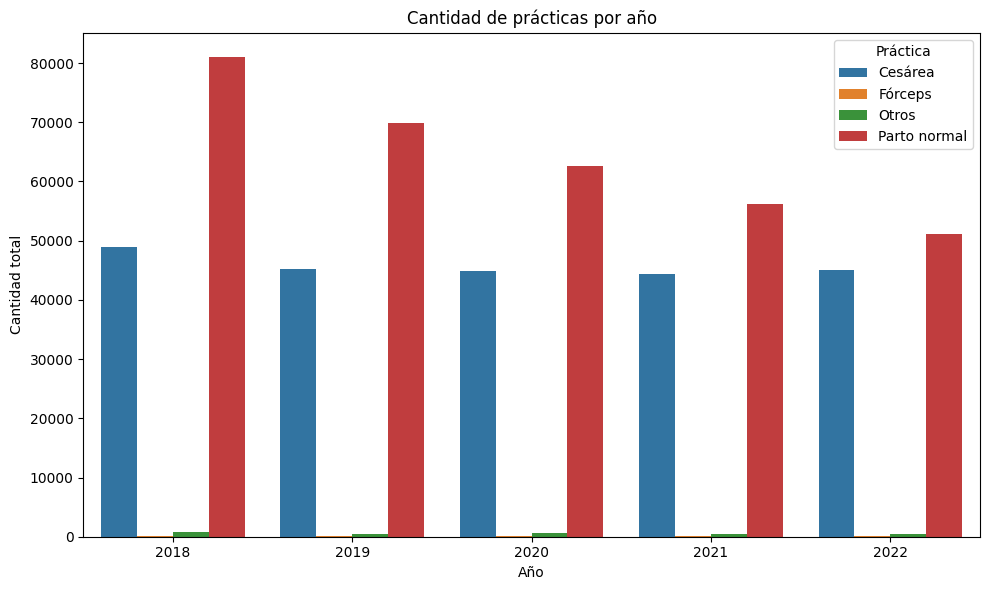

In [48]:
#Gráfico 1

# Agrupar por año y práctica, sumando las cantidades
practicas_por_anio = df.groupby(['anio', 'practica_nombre'])['cantidad'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(data=practicas_por_anio, x='anio', y='cantidad', hue='practica_nombre')
plt.title('Cantidad de prácticas por año')
plt.ylabel('Cantidad total')
plt.xlabel('Año')
plt.legend(title='Práctica')
plt.tight_layout()
plt.show()

Este gráfico de barras muestra la cantidad total de prácticas médicas relacionadas con el parto por año, desglosadas por tipo de práctica.

Los partos normales disminuyen, mientras que las cesáreas se mantienen constantes.

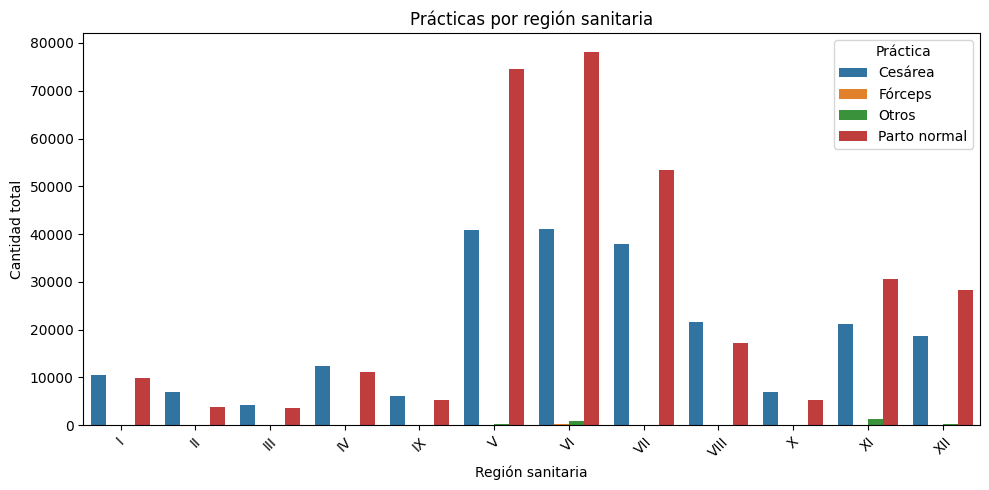

In [ ]:
#Gráfico 2
por_region = df.groupby(['region_sanitaria', 'practica_nombre'])['cantidad'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=por_region, x='region_sanitaria', y='cantidad', hue='practica_nombre')
plt.title('Prácticas por región sanitaria')
plt.xlabel('Región sanitaria')
plt.ylabel('Cantidad total')
plt.xticks(rotation=45)
plt.legend(title='Práctica')
plt.tight_layout()
plt.show()

Este gráfico de barras muestra la cantidad total de prácticas de parto realizadas por región sanitaria, clasificadas por tipo de práctica:


Regiones V, VI y VII son las que más partos tienen, destacándose en partos normales y cesáreas.

Regiones I, II, III y IX tienen cantidades mucho menores en todas las prácticas.

Regiones XI y XII también tienen una cantidad considerable, pero menos que V, VI y VII.

En todas las regiones, el parto normal es más frecuente que la cesárea, excepto en algunas como la VIII y X, donde están más equilibradas.

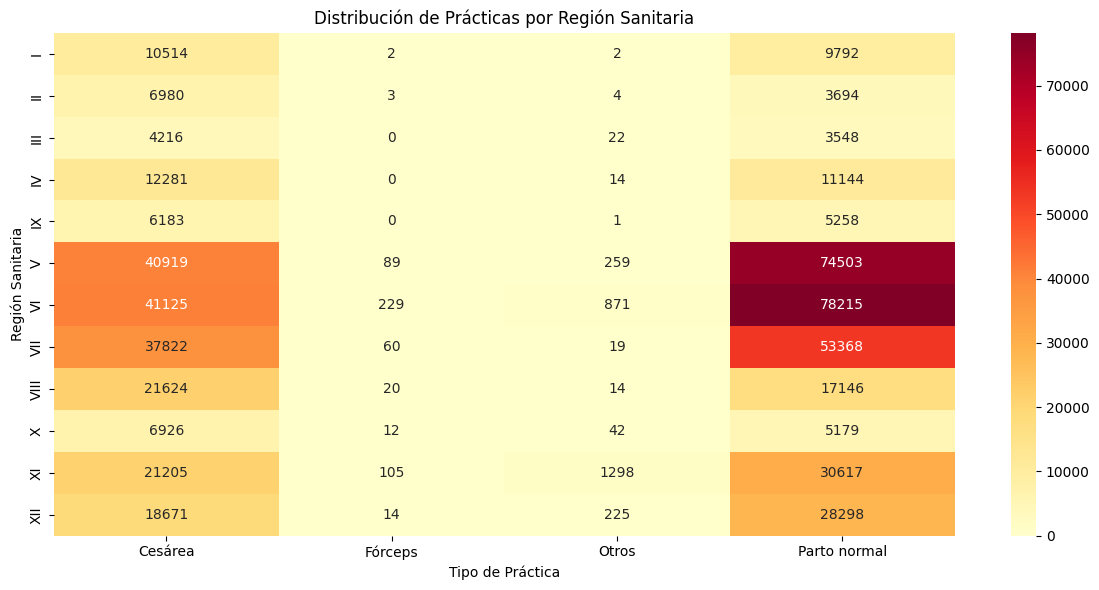

In [47]:
#Gráfico 3
# Mapa de calor por región y práctica
pivot_table = df.pivot_table(index='region_sanitaria',
                            columns='practica_nombre',
                            values='cantidad',
                            aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Distribución de Prácticas por Región Sanitaria')
plt.xlabel('Tipo de Práctica')
plt.ylabel('Región Sanitaria')
plt.tight_layout()
plt.show()

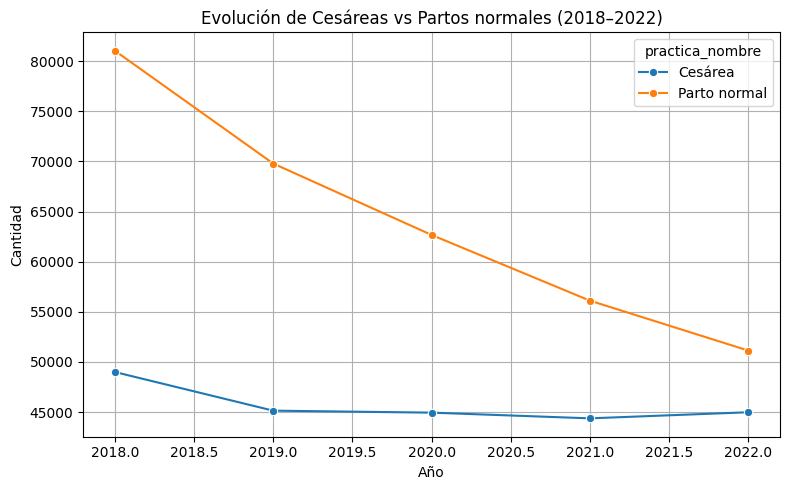

In [ ]:
#Gráfico 4
# Filtrar solo las prácticas clave
claves = ['Cesárea', 'Parto normal']
df_claves = df[df['practica_nombre'].isin(claves)]

# Agrupar y graficar
evolucion_claves = df_claves.groupby(['anio', 'practica_nombre'])['cantidad'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=evolucion_claves, x='anio', y='cantidad', hue='practica_nombre', marker='o')
plt.title('Evolución de Cesáreas vs Partos normales (2018–2022)')
plt.ylabel('Cantidad')
plt.xlabel('Año')
plt.grid(True)
plt.tight_layout()
plt.show()

Este gráfico de líneas muestra la evolución en el tiempo (2018–2022) de dos tipos de prácticas de parto:

Entre 2018 y 2022, los partos normales bajaron significativamente, mientras que las cesáreas se mantuvieron estables, lo que indica una posible tendencia a la mayor proporción de cesáreas sobre partos normales con el paso del tiempo.

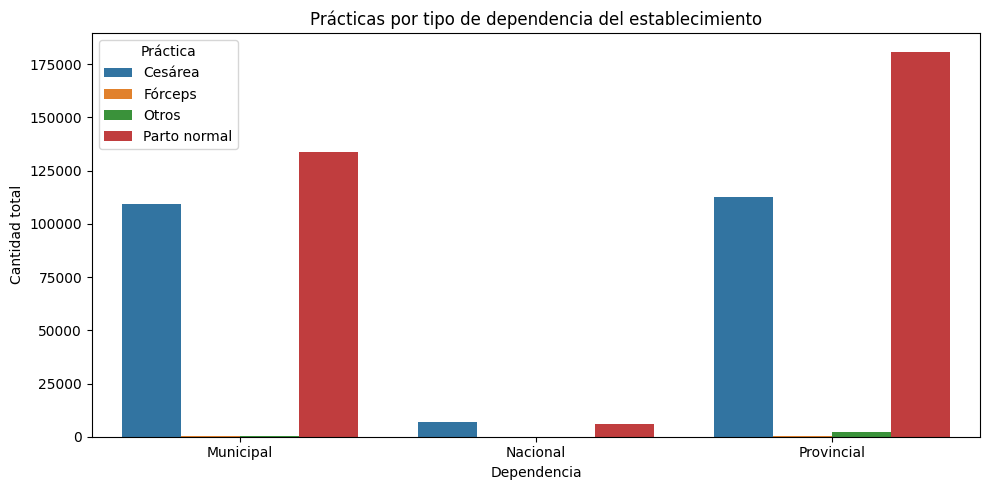

In [ ]:
#Gráfico 5
por_dependencia = df.groupby(['establecimiento_dependencia', 'practica_nombre'])['cantidad'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=por_dependencia, x='establecimiento_dependencia', y='cantidad', hue='practica_nombre')
plt.title('Prácticas por tipo de dependencia del establecimiento')
plt.xlabel('Dependencia')
plt.ylabel('Cantidad total')
plt.legend(title='Práctica')
plt.tight_layout()
plt.show()

Este gráfico de barras muestra la cantidad total de prácticas de parto según el tipo de dependencia del establecimiento de salud:

La mayoría de los partos (tanto normales como por cesárea) se realizan en establecimientos provinciales y municipales, siendo los nacionales los menos utilizados.

Este gráfico de líneas muestra la evolución anual (2018–2022) del total de prácticas de parto, divididas por tipo de intervención.




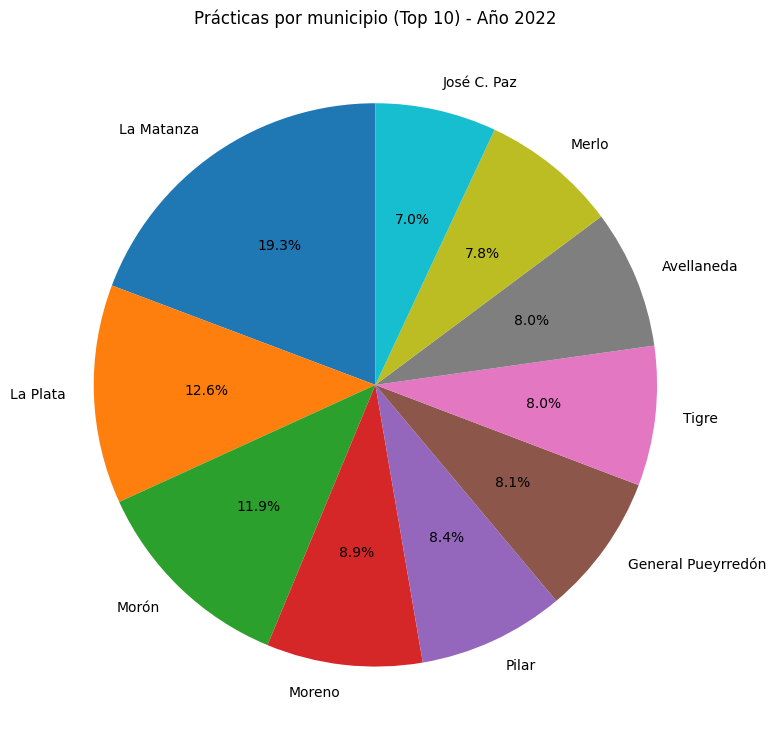

In [ ]:
#Gráfico 6
df_2022 = df[df['anio'] == 2022]
por_municipio = df_2022.groupby('municipio_nombre')['cantidad'].sum().sort_values(ascending=False).head(10)

por_municipio.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), startangle=90)
plt.title('Prácticas por municipio (Top 10) - Año 2022')
plt.ylabel('')
plt.tight_layout()
plt.show()

Este gráfico de torta muestra la distribución porcentual de las prácticas de parto realizadas en los 10 municipios con mayor cantidad de prácticas en el año 2022.

Hay una clara concentración de prácticas en algunos municipios, especialmente en La Matanza. El resto de los municipios tienen una distribución bastante pareja, con valores cercanos entre sí.

<ipython-input-17-038916e03c6b>:37: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


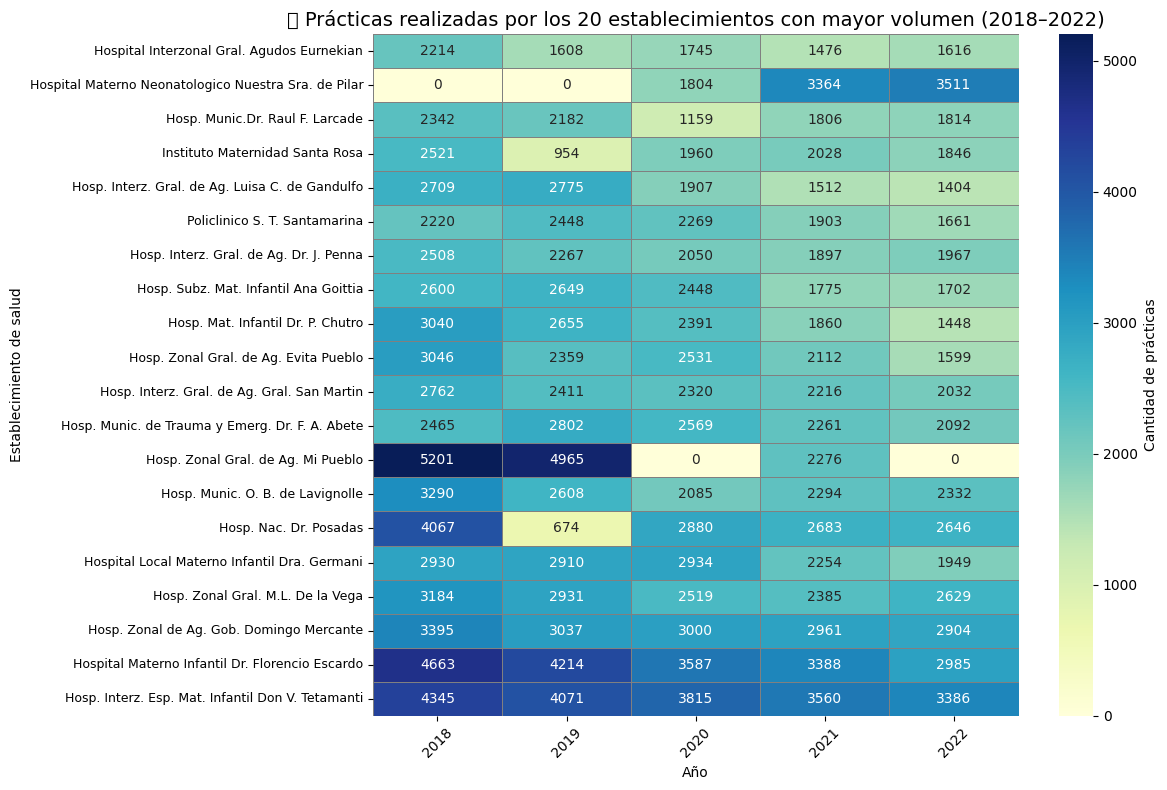

In [ ]:
#Gráfico 7
# Agrupar por establecimiento y año, sumando la cantidad de prácticas
establecimiento_anio = df.groupby(['establecimiento_nombre', 'anio'])['cantidad'].sum().unstack(fill_value=0)

# Seleccionar los 20 establecimientos con más prácticas acumuladas en todos los años
top_establecimientos = (
    establecimiento_anio
    .sum(axis=1)
    .sort_values(ascending=False)
    .head(20)
    .index
)

# Filtrar solo esos 20 establecimientos
heatmap_data = establecimiento_anio.loc[top_establecimientos]

# Ordenar los establecimientos por total descendente (para mejorar la lectura del gráfico)
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=True).index]

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Cantidad de prácticas'}
)

# Mejorar los títulos y etiquetas
plt.title('🔍 Prácticas realizadas por los 20 establecimientos con mayor volumen (2018–2022)', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Establecimiento de salud')
plt.xticks(rotation=45)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

Este gráfico muestra las prácticas realizadas en los 20 establecimientos de salud con mayor volumen entre 2018 y 2022.

En el eje vertical se encuentran los nombres de los hospitales y centros de salud, y en el eje horizontal se muestran los años (2018-2022). Los colores dentro del gráfico indican la cantidad de prácticas realizadas, con una escala de colores que va del azul (alto volumen) al verde claro (bajo volumen).

El gráfico también muestra que algunos hospitales tuvieron un incremento significativo de prácticas realizadas en ciertos años, como el Hospital Zonal Gral. de Ag. Mi Pueblo, que reportó un gran volumen de prácticas en 2018 y 2019, o el Hospital Materno Neonatologico Nuestra Sra. de Pilar, que tuvo un fuerte aumento en 2022.

Además, algunos hospitales tienen una marcada variación en sus cifras entre los años, lo que podría reflejar cambios en la actividad, recursos, o la demanda de servicios.

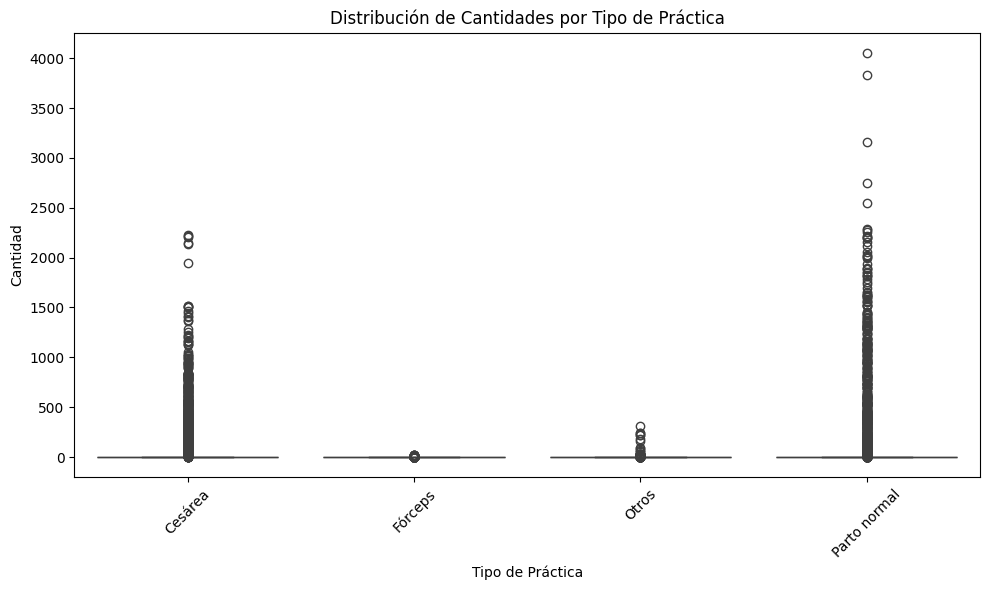

In [ ]:
#Gráfico 8
# Boxplot de distribución de cantidades por práctica
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='practica_nombre', y='cantidad')
plt.title('Distribución de Cantidades por Tipo de Práctica')
plt.xlabel('Tipo de Práctica')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-42-5980f94536d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cantidad', y='municipio_nombre', data=top_municipios, palette='mako')


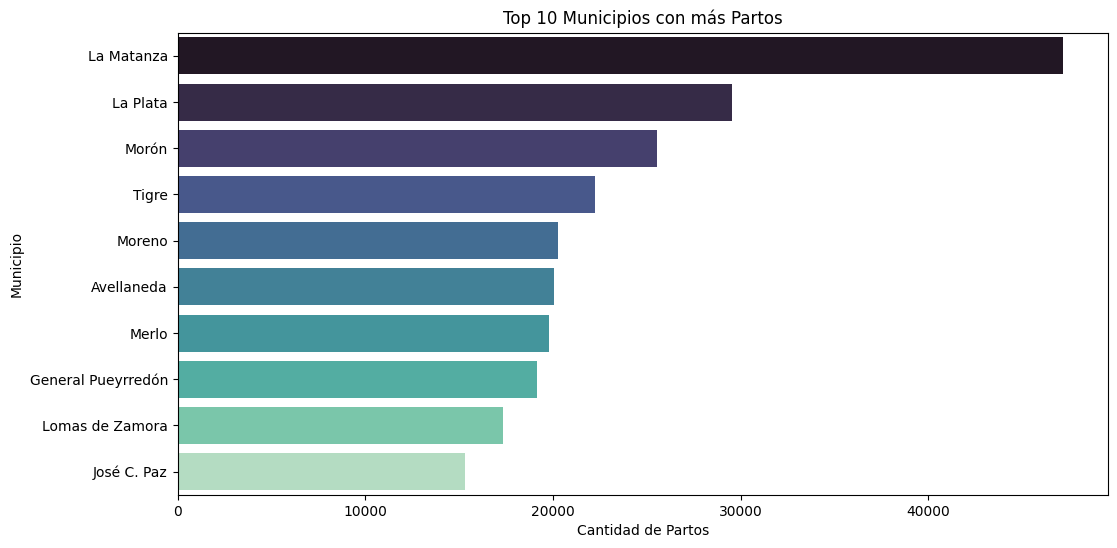

In [42]:
# Gráfico 9: Top 10 municipios con más partos
top_municipios = df.groupby('municipio_nombre')['cantidad'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='cantidad', y='municipio_nombre', data=top_municipios, palette='mako')
plt.savefig('/content/drive/MyDrive/MD-G/nombre_del_grafico.png')
plt.title('Top 10 Municipios con más Partos')
plt.xlabel('Cantidad de Partos')
plt.ylabel('Municipio')
plt.show()

Informe General del análisis que hicimos de la base de datos de Partos y cesáreas (2018-2022):

- Estructura de la base de datos:
La base contiene registros de prácticas médicas desagregadas por:

Año: (anio)

Región Sanitaria: (region_sanitaria)

Municipio: (ID y nombre)

Establecimiento de Salud: (ID, nombre y tipo de dependencia)

Práctica Médica: (practica_nombre)

Cantidad realizada


- Entre 2018 y 2022, se registró una disminución generalizada en la cantidad de prácticas médicas, posiblemente asociada al contexto de la pandemia, restricciones sanitarias y cambios en la demanda de servicios.
La caída fue más marcada entre 2020 y 2021.
En 2022 se observa una leve recuperación, aunque sin alcanzar los niveles prepandemia.

- Regiones sanitarias con mayor actividad:

Las regiones V, VI y VII lideran en número de prácticas durante todos los años analizados. Esto puede estar relacionado con:
Mayor densidad poblacional.
Mayor cantidad o capacidad de establecimientos de salud.
Más infraestructura y recursos humanos.

- Establecimientos y dependencia:

Los establecimientos están clasificados por dependencia (Municipal, Provincial y Nacional.), siendo los de dependencia Municipal los más frecuentes en los registros. Esto sugiere una fuerte participación de los gobiernos locales en la atención primaria y obstétrica.

- Municipios y concentración:

Algunos municipios se destacan por una alta concentración de prácticas, lo que puede reflejar:
Centros urbanos con hospitales de referencia.
Localidades con mayor población.
Diferencias en el acceso o la demanda de atención médica.

- Prácticas más comunes:

Entre las prácticas registradas se destacan:
Parto normal y Cesárea, como los procedimientos más frecuentes.
Prácticas como Fórceps o categorías agrupadas como “Otros” aparecen con menor frecuencia.
Esto permite suponer que el dataset está centrado principalmente en atención obstétrica o perinatal.

- Calidad de los datos:

No se observan valores faltantes en las columnas principales.
Los valores de cantidad son enteros, lo que indica conteos directos y facilita su análisis.
Las categorías están bien definidas, aunque algunas prácticas requerieron estandarización o agrupamiento para un análisis más detallados.

- Conclusión general:

Esta base de datos proporciona un panorama amplio y detallado de las prácticas obstétricas realizadas en distintas regiones sanitarias durante el período 2018–2022. Permite observar tanto las diferencias habituales en la actividad de cada región como el impacto que provocó la pandemia en la prestación de servicios. Además, representa una fuente valiosa para estudiar la distribución de prácticas médicas, identificar patrones locales y tomar decisiones en ámbitos como la gestión de recursos, la mejora del acceso a la atención y el diseño de políticas sanitarias.

